### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [1]:
#import sklearn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [2]:
#import os
#os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

Restart the Kernel. 

In [3]:
#!python -m pip install --upgrade scikit-learn
#import sklearn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [4]:
## Now you can import and use OneHotEncoder
#from sklearn.preprocessing import OneHotEncoder
# your code goes here


In [5]:
# Similarly, should you need any other package, they can install it as:
#!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [6]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [7]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep =';')
#customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep =';')

# Load in the feature summary file.
feature_summary = pd.read_csv('AZDIAS_Feature_Summary.csv', sep =';')

In [8]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.shape

(891221, 85)

In [9]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [10]:
feature_summary.shape

(85, 4)

In [11]:
feature_summary.head()


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [12]:
#get number of nans in general demographics data 
azdias.isna().sum().sum()

4896838

In [13]:
#get value codes for the missing_or_unknown column
feature_summary.missing_or_unknown.unique()

array(['[-1,0]', '[-1,0,9]', '[0]', '[-1]', '[]', '[-1,9]', '[-1,X]',
       '[XX]', '[-1,XX]'], dtype=object)

The missing_or_unknown column has brackets around the values. I will remove those.

In [14]:
#remove "[" and "]" from feature_summary missing_or_unknown column
feature_summary['missing_or_unknown'] = feature_summary['missing_or_unknown'].str.replace('[','')
feature_summary['missing_or_unknown'] = feature_summary['missing_or_unknown'].str.replace(']','')


In [15]:
#confirm that brackets are removed from missing_or_unknown column
feature_summary.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"-1,0"
1,ALTERSKATEGORIE_GROB,person,ordinal,"-1,0,9"
2,ANREDE_KZ,person,categorical,"-1,0"
3,CJT_GESAMTTYP,person,categorical,0
4,FINANZ_MINIMALIST,person,ordinal,-1


The values in the missing_or_unknown column are separated by commas. I will split the values in the column into separate columns

In [16]:
#split string in missing_or_unknown_column into separate columns
missing_value_code = feature_summary['missing_or_unknown'].str.split(',', expand = True)


In [17]:
#add the split string columns to the feature_summary dataframe
feature_summary = pd.concat([feature_summary,missing_value_code], axis=1)

In [18]:
#confirm that columns have been added
feature_summary.head()

,attribute,information_level,type,missing_or_unknown,0,1,2
0,AGER_TYP,person,categorical,"-1,0",-1,0,None
1,ALTERSKATEGORIE_GROB,person,ordinal,"-1,0,9",-1,0,9
2,ANREDE_KZ,person,categorical,"-1,0",-1,0,None
3,CJT_GESAMTTYP,person,categorical,0,0,None,None
4,FINANZ_MINIMALIST,person,ordinal,-1,-1,None,None


In [19]:
#rename added columns
feature_summary = feature_summary.rename({0:'missing_or_unknown_0',1:'missing_or_unknown_1',2:'missing_or_unknown_2'}, axis=1)

In [20]:
#confirm renaming of columns
feature_summary.head()

,attribute,information_level,type,missing_or_unknown,missing_or_unknown_0,missing_or_unknown_1,missing_or_unknown_2
0,AGER_TYP,person,categorical,"-1,0",-1,0,None
1,ALTERSKATEGORIE_GROB,person,ordinal,"-1,0,9",-1,0,9
2,ANREDE_KZ,person,categorical,"-1,0",-1,0,None
3,CJT_GESAMTTYP,person,categorical,0,0,None,None
4,FINANZ_MINIMALIST,person,ordinal,-1,-1,None,None


In [21]:
#create variable to store non-numeric value codes for missing or unknowns
problem_values = ['X', 'XX']

#replace the problem values with NAN in the azdias dataframe
azdias.replace(problem_values, np.nan, inplace=True)

In [22]:
#create dataframe for missing_or_unknown_0 column
nan_code_0 = feature_summary.drop(columns=['information_level', 'type', 'missing_or_unknown', 'missing_or_unknown_1', 'missing_or_unknown_2']) 
nan_code_0.head()

,attribute,missing_or_unknown_0
0,AGER_TYP,-1
1,ALTERSKATEGORIE_GROB,-1
2,ANREDE_KZ,-1
3,CJT_GESAMTTYP,0
4,FINANZ_MINIMALIST,-1


Since I have replaced the 'X', 'XX', and blank ('') with NaN, I can remove those rows from the nan_code_o dataframe.

In [23]:
#remove rows with 'X', 'XX' or '' in missing_or_unknown_0 column

nan_code_0 = nan_code_0.drop(nan_code_0[(nan_code_0['missing_or_unknown_0'] == 'X')].index)
                                      
nan_code_0 = nan_code_0.drop(nan_code_0[(nan_code_0['missing_or_unknown_0'] == 'XX')].index) 

nan_code_0 = nan_code_0.drop(nan_code_0[(nan_code_0['missing_or_unknown_0'] == '')].index)                                        

In [24]:
nan_code_0['missing_or_unknown_0'].unique()

array(['-1', '0'], dtype=object)

In [25]:
#convert missing_or_unknown_0 to int to float
nan_code_0['missing_or_unknown_0'] = nan_code_0['missing_or_unknown_0'].astype(np.float64)


In [26]:
#confirm missing_or_unknown_0 has been changed to float
nan_code_0.dtypes

attribute                object
missing_or_unknown_0    float64
dtype: object

Since I have changed the numeric values to float type in missing_or_unknown_0 column, I will need to change the numeric values in the azdias dataframe to float so that I can compare the values to the missing or unknow codes.

In [27]:
#change all int type vales in azdias dataframe to float
for i in azdias.columns:
    if azdias[i].dtype == np.int64:
        azdias[i] = azdias[i].astype(np.float64)

In [28]:
#confirm that numeric values have been change to type float in the azdias dataframe
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1.0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,0.0,10.0,0.0,-1.0,15.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0,5.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,-1.0,NaN,NaN,-1.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,1996.0,10.0,0.0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,3.0,1.0,0.0,2.0,5.0,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1.0,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,1979.0,10.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,2.0,0.0,0.0,1.0,5.0,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,1957.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,1.0,8.0,2.0,5.0,1.0,2.0,1.0,4.0,4.0,7.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,1.0,0.0,0.0,1.0,3.0,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1.0,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,1963.0,5.0,0.0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,2.0,4.0,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [29]:
#for the values in each column of the azdias dataframe, change values to NaN if the value matches the
#missing_or_unknown_0 value code
for i in range(len(nan_code_0)):
    nan = nan_code_0.iloc[i]['missing_or_unknown_0']
    azdias = azdias.replace({nan_code_0.iloc[i]['attribute']:nan}, np.nan)

In [30]:
#get new number of nans in the azdias dataframe
azdias.isna().sum().sum()

6872969

In [31]:
#create dataframe for missing_or_unknown_1 column
nan_code_1 = feature_summary.drop(columns=['information_level', 'type', 'missing_or_unknown', 'missing_or_unknown_0', 'missing_or_unknown_2'])

#remove rows with 'X', 'XX' or '' in missing_or_unknown_1 column

nan_code_1 = nan_code_1.drop(nan_code_1[(nan_code_1['missing_or_unknown_1'] == 'X')].index)
                                      
nan_code_1 = nan_code_1.drop(nan_code_1[(nan_code_1['missing_or_unknown_1'] == 'XX')].index) 

nan_code_1 = nan_code_1.dropna(axis = 0, how ='any')

nan_code_1 = nan_code_1.drop(nan_code_1[(nan_code_1['missing_or_unknown_1'] == '')].index)  



In [32]:
#check unique values in missing_or_unknown_1 to confirm that un-needed rows have been removed
nan_code_1['missing_or_unknown_1'].unique()

array(['0', '9'], dtype=object)

In [33]:
#set missing_or_unknown_1 column as float type
nan_code_1['missing_or_unknown_1'] = nan_code_1['missing_or_unknown_1'].astype(np.float64)

In [34]:
#confirm missing_or_unknown_1 has been changed to float
nan_code_1.dtypes

attribute                object
missing_or_unknown_1    float64
dtype: object

In [35]:
#for the values in each column of the azdias dataframe, change values to NaN if the value matches the
#missing_or_unknown_1 value code
for i in range(len(nan_code_1)):
    nan1 = nan_code_1.iloc[i]['missing_or_unknown_1']
    azdias = azdias.replace({nan_code_1.iloc[i]['attribute']:nan1}, np.nan)

In [36]:
#get new number of nans in the azdias dataframe
azdias.isna().sum().sum()

8371048

In [37]:
#create dataframe for missing_or_unknown_2 column
nan_code_2 = feature_summary.drop(columns=['information_level', 'type', 'missing_or_unknown', 'missing_or_unknown_0', 'missing_or_unknown_1'])

#remove rows with 'X', 'XX' or '' in missing_or_unknown_2 column

nan_code_2 = nan_code_2.drop(nan_code_2[(nan_code_2['missing_or_unknown_2'] == 'X')].index)
                                      
nan_code_2 = nan_code_2.drop(nan_code_2[(nan_code_2['missing_or_unknown_2'] == 'XX')].index) 

nan_code_2 = nan_code_2.dropna(axis = 0, how ='any')

nan_code_2 = nan_code_2.drop(nan_code_2[(nan_code_2['missing_or_unknown_2'] == '')].index) 


In [38]:
#check unique values in missing_or_unknown_2 to confirm that un-needed rows have been removed
nan_code_2['missing_or_unknown_2'].unique()

array(['9'], dtype=object)

In [39]:
#set column as int type
nan_code_2['missing_or_unknown_2'] = nan_code_2['missing_or_unknown_2'].astype(np.float64)

In [40]:
#confirm missing_or_unknown_2 has been changed to float
nan_code_2.dtypes

attribute                object
missing_or_unknown_2    float64
dtype: object

In [41]:
#for the values in each column of the azdias dataframe, change values to NaN if the value matches the
#missing_or_unknown_2 value code
for i in range(len(nan_code_2)):
    nan2 = nan_code_2.iloc[i]['missing_or_unknown_2']
    azdias = azdias.replace({nan_code_2.iloc[i]['attribute']:nan2}, np.nan)

In [42]:
#get new number of nans in the azdias dataframe
azdias.isna().sum().sum()

8373929

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [44]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
azdias_na_count = azdias.isna().sum()
azdias_na_count

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

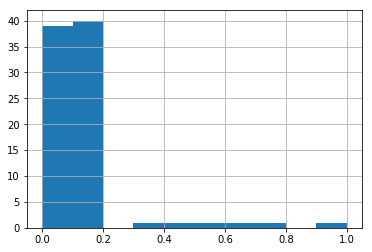

In [45]:
# Investigate patterns in the amount of missing data in each column.
#azdias_na_count.hist()
percent_missing = azdias.isnull().sum() / len(azdias)
percent_missing.hist()

Next, I will create a function to get the percent of missing values in column.

In [46]:
#create function to get percent of missing values in column
def percent_column_nans(df):
    percent_nans = df.isnull().sum() / len(df)
    return percent_nans

In [47]:
#list percent of missing values for each column
percent_column_nans(azdias)

AGER_TYP                 0.769554
ALTERSKATEGORIE_GROB     0.003233
ANREDE_KZ                0.000000
CJT_GESAMTTYP            0.005446
FINANZ_MINIMALIST        0.000000
FINANZ_SPARER            0.000000
FINANZ_VORSORGER         0.000000
FINANZ_ANLEGER           0.000000
FINANZ_UNAUFFAELLIGER    0.000000
FINANZ_HAUSBAUER         0.000000
FINANZTYP                0.000000
GEBURTSJAHR              0.440203
GFK_URLAUBERTYP          0.005446
GREEN_AVANTGARDE         0.000000
HEALTH_TYP               0.124768
LP_LEBENSPHASE_FEIN      0.109549
LP_LEBENSPHASE_GROB      0.106115
LP_FAMILIE_FEIN          0.087287
LP_FAMILIE_GROB          0.087287
LP_STATUS_FEIN           0.005446
LP_STATUS_GROB           0.005446
NATIONALITAET_KZ         0.121536
PRAEGENDE_JUGENDJAHRE    0.121366
RETOURTYP_BK_S           0.005446
SEMIO_SOZ                0.000000
SEMIO_FAM                0.000000
SEMIO_REL                0.000000
SEMIO_MAT                0.000000
SEMIO_VERT               0.000000
SEMIO_LUST    

Based on the visual above, there are a good amount of columns that are missing 20% data. Let take a look at the columns that are missing 20% or more data.

In [48]:
#get columns with 20% or more missing data
azdias_null = azdias.isnull().sum() / len(azdias)
outlier_columns = azdias_null[azdias_null > 0.20].index
outlier_columns

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

In [49]:
#list outlier columns with percent of missing data
for column in outlier_columns:
    print('Outlier column: {}  {:.2f}'.format(column, azdias[column].isnull().sum() / len(azdias) * 100))

Outlier column: AGER_TYP  76.96
Outlier column: GEBURTSJAHR  44.02
Outlier column: TITEL_KZ  99.76
Outlier column: ALTER_HH  34.81
Outlier column: KK_KUNDENTYP  65.60
Outlier column: KBA05_BAUMAX  53.47


In [50]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.drop(outlier_columns, axis=1, inplace=True)

In [51]:
#view number of columns after dropping the outlier columns
azdias.shape

(891221, 79)

In [52]:
azdias.isna().sum().sum()

5035304

#### Discussion 1.1.2: Assess Missing Data in Each Column

After reviewing the above visual, I noticed there are columns missing 20% or more data and labels them as outlier columns.

There are 6 outlier columns, these columns have more than 20% of missing or unknown data: 
AGER_TYP      76.96 missing data
GEBURTSJAHR   44.02 missing data
TITEL_KZ      99.76 missing data
ALTER_HH      34.81 missing data
KK_KUNDENTYP  65.60 missing data
KBA05_BAUMAX  53.47 missing data

These 6 columns have been removed from the azdias dataframe. We began with 85 columns, now we have 79 columns.

We initially had 4,896,838 missing or unknown values. After replacing the values that were missing or unknown value codes, we were left with 8,373,929 null values. 


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [53]:
# How much data is missing in each row of the dataset?
row_na_count = azdias.apply(lambda x: sum(x.isnull().values), axis = 1)


In [54]:
row_na_count.head()

0    43
1     0
2     0
3     7
4     0
dtype: int64

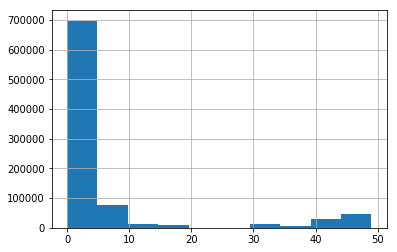

In [55]:
#plot number of nans in each row
row_na_count.hist()

In [56]:
#creat variable to get percent of nans in the row of the azdias dataframe
percent_nan_rows = azdias.apply(lambda x: sum(x.isnull().values), axis = 1) / azdias.apply(lambda x: len(x.values), axis = 1)


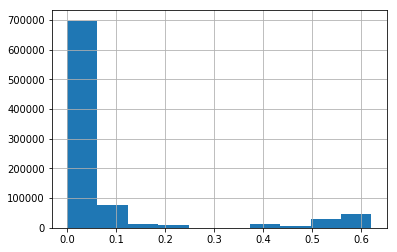

In [57]:
#plot percent of nans in each row
percent_nan_rows.hist()

There is good amount of rows that missing at least 5% of data. I will split the dataframe into two subsets. One subset with rows missing less than 5% data and the other with rows missing 5% or more data. I will title them as "azdias_low_nans_df" and azdias_high_nans_df"

In [58]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
azdias_low_nans_df = azdias[azdias.apply(lambda x: sum(x.isnull().values), axis = 1) / azdias.apply(lambda x: len(x.values), axis = 1) <0.05]
azdias_high_nans_df = azdias[azdias.apply(lambda x: sum(x.isnull().values), axis = 1) / azdias.apply(lambda x: len(x.values), axis = 1) >=0.05] 


In [59]:
azdias_low_nans_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,10.0,0.0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,3.0,1.0,2.0,5.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,10.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,2.0,0.0,1.0,5.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,5.0,0.0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,2.0,0.0,2.0,4.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,1.0,0.0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2.0,4.0,7.0,4.0,2.0,2.0,2.0,5.0,7.0,4.0,4.0,4.0,7.0,6.0,0.0,0.0,2.0,4.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,2.0,2.0,5.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,12.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,10.0,4.0,2.0,5.0,5.0,7.0,2.0,6.0,5.0,5.0,7.0,7.0,4.0,7.0,7.0,7.0,1.0,0.0,1.0,4.0,1.0,0.0,6.0,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0


In [60]:
azdias.shape

(891221, 79)

In [61]:
azdias_high_nans_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,10.0,0.0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5.0,1.0,2.0,1.0,4.0,4.0,7.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
11,2.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,3.0,2.0,6.0,7.0,5.0,1.0,5.0,3.0,3.0,4.0,7.0,6.0,6.0,5.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,3.0,1.0,6.0,5.0,3.0,4.0,2.0,4.0,1.0,3.0,10.0,0.0,1.0,23.0,6.0,5.0,3.0,9.0,4.0,1.0,8.0,5.0,3.0,4.0,4.0,6.0,7.0,6.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,4.0,6.0,4.0,1.0,0.0,1.0,5.0,2005.0,W,3.0,6,6B,43,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.0,4.0,3.0,NaN,4.0,7.0,1106.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,3.0,6.0,4.0
13,1.0,2.0,5.0,1.0,4.0,3.0,5.0,5.0,2.0,1.0,12.0,1.0,3.0,3.0,1.0,1.0,1.0,5.0,2.0,1.0,15.0,1.0,2.0,4.0,5.0,4.0,1.0,2.0,4.0,3.0,6.0,7.0,6.0,4.0,5.0,6.0,3.0,0.0,2.0,5.0,1.0,0.0,3.0,6.0,3.0,2.0,0.0,1.0,5.0,2009.0,W,5.0,5,5C,33,NaN,NaN,NaN,NaN,NaN,7.0,2.0,8.0,4.0,NaN,NaN,5.0,NaN,486.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,6.0,4.0


In [62]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
percent_column_nans(azdias_low_nans_df)



ALTERSKATEGORIE_GROB     0.000000
ANREDE_KZ                0.000000
CJT_GESAMTTYP            0.000000
FINANZ_MINIMALIST        0.000000
FINANZ_SPARER            0.000000
FINANZ_VORSORGER         0.000000
FINANZ_ANLEGER           0.000000
FINANZ_UNAUFFAELLIGER    0.000000
FINANZ_HAUSBAUER         0.000000
FINANZTYP                0.000000
GFK_URLAUBERTYP          0.000000
GREEN_AVANTGARDE         0.000000
HEALTH_TYP               0.000000
LP_LEBENSPHASE_FEIN      0.000003
LP_LEBENSPHASE_GROB      0.000001
LP_FAMILIE_FEIN          0.000000
LP_FAMILIE_GROB          0.000000
LP_STATUS_FEIN           0.000000
LP_STATUS_GROB           0.000000
NATIONALITAET_KZ         0.000000
PRAEGENDE_JUGENDJAHRE    0.009928
RETOURTYP_BK_S           0.000000
SEMIO_SOZ                0.000000
SEMIO_FAM                0.000000
SEMIO_REL                0.000000
SEMIO_MAT                0.000000
SEMIO_VERT               0.000000
SEMIO_LUST               0.000000
SEMIO_ERL                0.000000
SEMIO_KULT    

The following 5 columns are not missing any data.
ANREDE_KZ
CJT_GESAMTTYP
FINANZ_MINIMALIST
FINANZ_SPARER
FINANZ_VORSORGER

Let's compare the distribution of values for these 5 columns to the azdias_high_nans_dataframe in the below visuals.

In [63]:
#save 5 columns without nulls to columns_without_nans
columns_without_nans = ['ANREDE_KZ','CJT_GESAMTTYP','FINANZ_MINIMALIST', 'FINANZ_SPARER','FINANZ_VORSORGER']

In [64]:
#create function to create count plot visuals for columns_without_nans
def countplot_visual(column):
    fig, ax =plt.subplots(1,2, figsize=(15,8))
    sns.countplot(data=azdias_low_nans_df, x=column,ax=ax[0])
    sns.countplot(data=azdias_high_nans_df, x=column,ax=ax[1])
    ax[0].title.set_text('Azdias Dataframe With Low NANS')
    ax[1].title.set_text('Azdias Dataframe With High NANS')
    fig.show()
    return fig.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


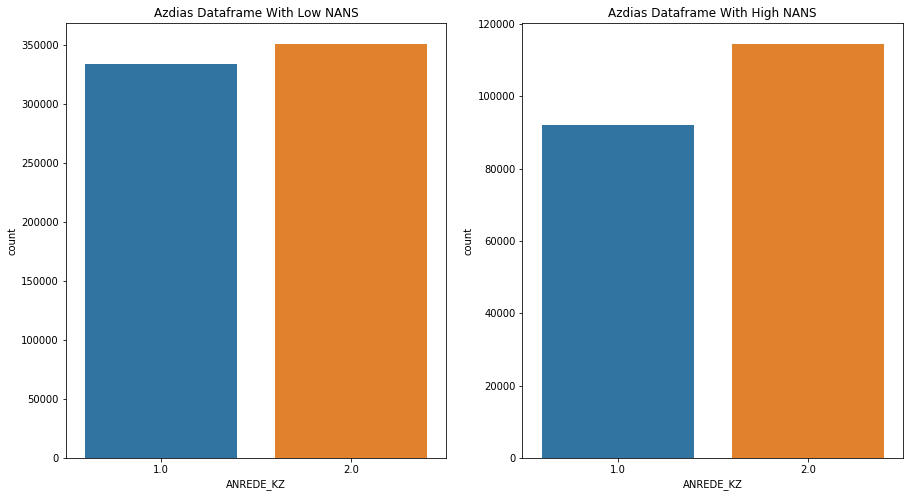

In [65]:
countplot_visual(columns_without_nans[0])

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


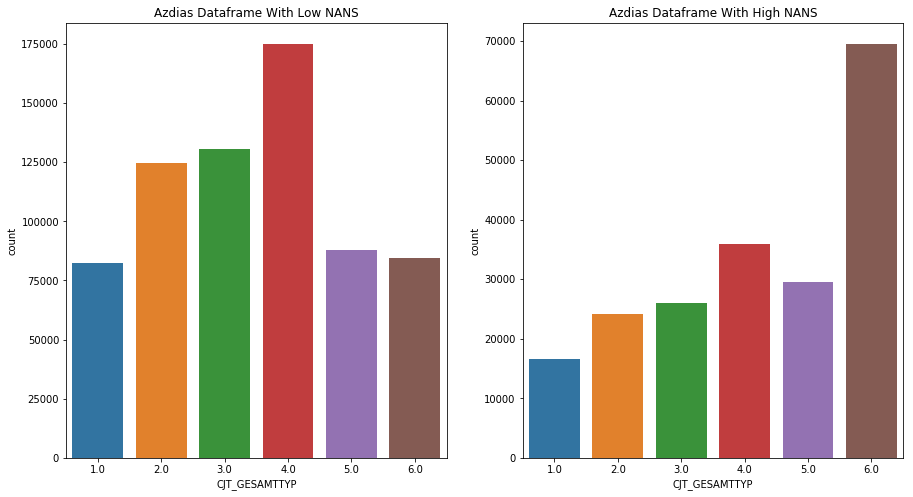

In [66]:
countplot_visual(columns_without_nans[1])

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


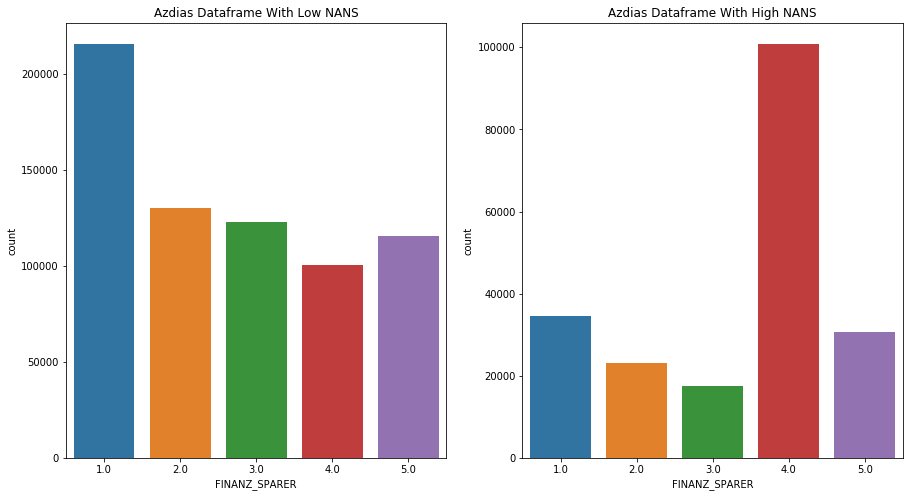

In [67]:
countplot_visual(columns_without_nans[3])

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


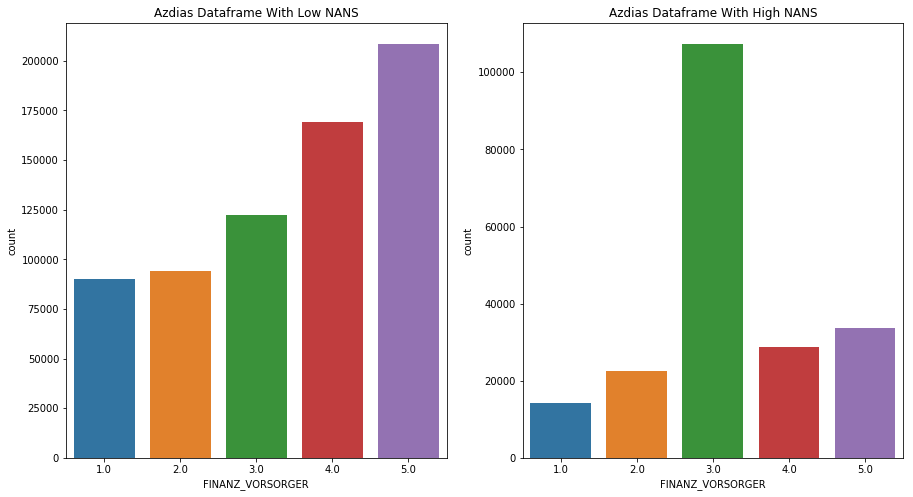

In [68]:
countplot_visual(columns_without_nans[4])

#### Discussion 1.1.3: Assess Missing Data in Each Row

The data with lots of missing values are qualitatively different from data with no missing values. In some areas where the value is high for the column that is not missing data, it is lower for the column that is missing lots of values, and vice versa. 

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [69]:
# How many features are there of each data type?
feature_summary['type'].value_counts()


ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [70]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

categorical_col = feature_summary[feature_summary['type'] == 'categorical']
categorical_col

,attribute,information_level,type,missing_or_unknown,missing_or_unknown_0,missing_or_unknown_1,missing_or_unknown_2
0,AGER_TYP,person,categorical,"-1,0",-1,0,None
2,ANREDE_KZ,person,categorical,"-1,0",-1,0,None
3,CJT_GESAMTTYP,person,categorical,0,0,None,None
10,FINANZTYP,person,categorical,-1,-1,None,None
12,GFK_URLAUBERTYP,person,categorical,,,None,None
13,GREEN_AVANTGARDE,person,categorical,,,None,None
17,LP_FAMILIE_FEIN,person,categorical,0,0,None,None
18,LP_FAMILIE_GROB,person,categorical,0,0,None,None
19,LP_STATUS_FEIN,person,categorical,0,0,None,None
20,LP_STATUS_GROB,person,categorical,0,0,None,None


In [71]:
#create list of categorical columns to get unique values for each column
categorical_list = []
for attribute in categorical_col['attribute']:
    if attribute in azdias_low_nans_df.columns:
        categorical_list.append(attribute)

In [72]:
categorical_list

['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [73]:
#get unique values for each categorical column in the azdias_low_nans_df
v={}
for i in range(azdias_low_nans_df[categorical_list].shape[1]) :
    j=azdias_low_nans_df[categorical_list].columns[i]
    v[j] = azdias_low_nans_df[categorical_list].iloc[:,i].unique()

for p,q in v.items():
    print( f"unique value in {p} are {list(q)} ")

unique value in ANREDE_KZ are [2.0, 1.0] 
unique value in CJT_GESAMTTYP are [5.0, 3.0, 2.0, 4.0, 1.0, 6.0] 
unique value in FINANZTYP are [1.0, 5.0, 2.0, 4.0, 6.0, 3.0] 
unique value in GFK_URLAUBERTYP are [10.0, 5.0, 1.0, 12.0, 9.0, 3.0, 8.0, 11.0, 4.0, 7.0, 6.0, 2.0] 
unique value in GREEN_AVANTGARDE are [0.0, 1.0] 
unique value in LP_FAMILIE_FEIN are [5.0, 1.0, 10.0, 2.0, 7.0, 11.0, 8.0, 4.0, 6.0, 9.0, 3.0] 
unique value in LP_FAMILIE_GROB are [3.0, 1.0, 5.0, 2.0, 4.0] 
unique value in LP_STATUS_FEIN are [2.0, 3.0, 4.0, 1.0, 10.0, 8.0, 9.0, 5.0, 6.0, 7.0] 
unique value in LP_STATUS_GROB are [1.0, 2.0, 5.0, 4.0, 3.0] 
unique value in NATIONALITAET_KZ are [1.0, 2.0, 3.0] 
unique value in SHOPPER_TYP are [3.0, 2.0, 0.0, 1.0] 
unique value in SOHO_KZ are [1.0, 0.0] 
unique value in VERS_TYP are [2.0, 1.0] 
unique value in ZABEOTYP are [5.0, 4.0, 1.0, 6.0, 3.0, 2.0] 
unique value in GEBAEUDETYP are [8.0, 1.0, 3.0, 6.0, 2.0, 4.0, 5.0] 
unique value in OST_WEST_KZ are ['W', 'O'] 
unique va

The OST_WEST_KZ column has non-numeric binary values. We will need to keep this column, so we will re-encode it with numeric values.

In [74]:
# Re-encode categorical variable(s) to be kept in the analysis.
azdias_low_nans_df['OST_WEST_KZ'].replace(to_replace = ['W','O'], value =[0,1], inplace = True)
      

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
#confirm that values for OST_WEST_KZ have been changed to numeric values
azdias_low_nans_df.OST_WEST_KZ.unique()

array([0, 1])

In [76]:
#create variable to see which columns have more than two unique values
multi_level_cat_columns = azdias_low_nans_df[categorical_list].nunique() > 2

In [77]:
multi_level_cat_columns

ANREDE_KZ           False
CJT_GESAMTTYP        True
FINANZTYP            True
GFK_URLAUBERTYP      True
GREEN_AVANTGARDE    False
LP_FAMILIE_FEIN      True
LP_FAMILIE_GROB      True
LP_STATUS_FEIN       True
LP_STATUS_GROB       True
NATIONALITAET_KZ     True
SHOPPER_TYP          True
SOHO_KZ             False
VERS_TYP            False
ZABEOTYP             True
GEBAEUDETYP          True
OST_WEST_KZ         False
CAMEO_DEUG_2015      True
CAMEO_DEU_2015       True
dtype: bool

In [78]:
#drop the columns that have more than 2 unique values
azdias_low_nans_df.drop(['CJT_GESAMTTYP','FINANZTYP','GFK_URLAUBERTYP','LP_FAMILIE_FEIN','LP_FAMILIE_GROB','LP_STATUS_FEIN','LP_STATUS_GROB','NATIONALITAET_KZ','SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP','CAMEO_DEUG_2015','CAMEO_DEU_2015'], axis=1, inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [79]:
#confirm that the columns have been dropped
azdias_low_nans_df.shape

(684502, 66)

#### Discussion 1.2.1: Re-Encode Categorical Features

There was one categorical column with non-numeric binary values ('W' and 'O') named OST_WEST_KZ. I re-encoded the non-numeric values with numbers (0 and 1). I chose to drop the multi-level categorical columns (than 2 unique numeric values). I think this will give us more accurate projections. I also dropped the CAMEO_DEU_2015 column. This column had non-numeric values and had 44 unique values.

There are now 66 columns in the azdias_low_nans_df.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [80]:
#create dataframe for mixed type attributes
mixed_col = feature_summary[feature_summary['type'] == 'mixed']
mixed_col

,attribute,information_level,type,missing_or_unknown,missing_or_unknown_0,missing_or_unknown_1,missing_or_unknown_2
15,LP_LEBENSPHASE_FEIN,person,mixed,0,0,None,None
16,LP_LEBENSPHASE_GROB,person,mixed,0,0,None,None
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"-1,0",-1,0,None
56,WOHNLAGE,building,mixed,-1,-1,None,None
59,CAMEO_INTL_2015,microcell_rr4,mixed,"-1,XX",-1,XX,None
64,KBA05_BAUMAX,microcell_rr3,mixed,"-1,0",-1,0,None
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"-1,0",-1,0,None


In [81]:
#create list to store column names that have mixed type data
mixed_list = []
for attribute in mixed_col['attribute']:
    if attribute in azdias.columns:
        mixed_list.append(attribute)

In [82]:
#view mixed list
mixed_list

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'PLZ8_BAUMAX']

In [83]:
#get number of unique vales for each column included in mixed list
azdias_low_nans_df[mixed_list].nunique()

LP_LEBENSPHASE_FEIN      40
LP_LEBENSPHASE_GROB      12
PRAEGENDE_JUGENDJAHRE    15
WOHNLAGE                  8
CAMEO_INTL_2015          21
PLZ8_BAUMAX               5
dtype: int64

In [84]:
#get unique values for each mixed column in the azdias_low_nans_df
mv={}
for i in range(azdias_low_nans_df[mixed_list].shape[1]) :
    j=azdias_low_nans_df[mixed_list].columns[i]
    mv[j] = azdias_low_nans_df[mixed_list].iloc[:,i].unique()

for p,q in mv.items():
    print( f"unique value in {p} are {list(q)} ")

unique value in LP_LEBENSPHASE_FEIN are [21.0, 3.0, 32.0, 8.0, 2.0, 5.0, 10.0, 4.0, 6.0, 20.0, 1.0, 25.0, 13.0, 18.0, 31.0, 38.0, 30.0, 7.0, 22.0, 14.0, 35.0, 29.0, 24.0, 37.0, 26.0, 12.0, 39.0, 27.0, 36.0, 9.0, 34.0, 33.0, 15.0, 11.0, 40.0, 16.0, 19.0, 23.0, 28.0, 17.0, nan] 
unique value in LP_LEBENSPHASE_GROB are [6.0, 1.0, 10.0, 2.0, 3.0, 5.0, 7.0, 12.0, 9.0, 4.0, 11.0, 8.0, nan] 
unique value in PRAEGENDE_JUGENDJAHRE are [14.0, 15.0, 8.0, 3.0, 10.0, 11.0, 9.0, 6.0, 5.0, 4.0, nan, 2.0, 1.0, 12.0, 13.0, 7.0] 
unique value in WOHNLAGE are [4.0, 2.0, 3.0, 7.0, 5.0, 1.0, 8.0, 0.0] 
unique value in CAMEO_INTL_2015 are ['51', '24', '43', '54', '22', '14', '13', '15', '34', '55', '12', '41', '25', '23', '31', '52', '35', '45', '33', '44', '32', nan] 
unique value in PLZ8_BAUMAX are [1.0, 2.0, 4.0, 5.0, 3.0] 


In [85]:
#import markdown
#f = open('Data_Dictionary.md', 'r')
#htmlmarkdown=markdown.markdown( f.read() )

In [86]:
#view data_dictionary for PRAEGENDE_JUGENDJAHRE column
'''
PRAEGENDE_JUGENDJAHRE
Dominating movement of person\'s youth 
(avantgarde vs. mainstream; east vs. west)
-1: unknown 
0: unknown
1: 40s - war years (Mainstream, E+W)
2: 40s - reconstruction years (Avantgarde, E+W)
3: 50s - economic miracle (Mainstream, E+W)
4: 50s - milk bar / Individualisation (Avantgarde, E+W) 
5: 60s - economic miracle (Mainstream, E+W) 
6: 60s - generation 68 / student protestors (Avantgarde, W)  
7: 60s - opponents to the building of the Wall (Avantgarde, E)
8: 70s - family orientation (Mainstream, E+W) 
9: 70s - peace movement (Avantgarde, E+W) 
10: 80s - Generation Golf (Mainstream, W)
11: 80s - ecological awareness (Avantgarde, W)
12: 80s - FDJ / communist party youth organisation (Mainstream, E)
13: 80s - Swords into ploughshares (Avantgarde, E) 
14: 90s - digital media kids (Mainstream, E+W)
15: 90s - ecological awareness (Avantgarde, E+W)

'''

"\nPRAEGENDE_JUGENDJAHRE\nDominating movement of person's youth \n(avantgarde vs. mainstream; east vs. west)\n-1: unknown \n0: unknown\n1: 40s - war years (Mainstream, E+W)\n2: 40s - reconstruction years (Avantgarde, E+W)\n3: 50s - economic miracle (Mainstream, E+W)\n4: 50s - milk bar / Individualisation (Avantgarde, E+W) \n5: 60s - economic miracle (Mainstream, E+W) \n6: 60s - generation 68 / student protestors (Avantgarde, W)  \n7: 60s - opponents to the building of the Wall (Avantgarde, E)\n8: 70s - family orientation (Mainstream, E+W) \n9: 70s - peace movement (Avantgarde, E+W) \n10: 80s - Generation Golf (Mainstream, W)\n11: 80s - ecological awareness (Avantgarde, W)\n12: 80s - FDJ / communist party youth organisation (Mainstream, E)\n13: 80s - Swords into ploughshares (Avantgarde, E) \n14: 90s - digital media kids (Mainstream, E+W)\n15: 90s - ecological awareness (Avantgarde, E+W)\n\n"

In [87]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
#add variable for PRAEGENDE_JUGENDJAHRE_decade, and PRAEGENDE_JUGENDJAHRE_movement with copy of RAEGENDE_JUGENDJAHRE column
azdias_low_nans_df['PRAEGENDE_JUGENDJAHRE_decade'] = azdias_low_nans_df.loc[:,'PRAEGENDE_JUGENDJAHRE']
azdias_low_nans_df['PRAEGENDE_JUGENDJAHRE_movement'] = azdias_low_nans_df.loc[:,'PRAEGENDE_JUGENDJAHRE']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [88]:
#confirm that columns PRAEGENDE_JUGENDJAHRE_decade, and PRAEGENDE_JUGENDJAHRE_movement have been added to the dataframe
azdias_low_nans_df.head()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_decade,PRAEGENDE_JUGENDJAHRE_movement
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,21.0,6.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,14.0,14.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,1.0,15.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,15.0,15.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,32.0,10.0,8.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,0,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,8.0,8.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,8.0,2.0,3.0,3.0,2.0,4.0,7.0,4.0,2.0,2.0,2.0,5.0,7.0,4.0,4.0,4.0,7.0,6.0,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,0,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,3.0,3.0
6,2.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,0.0,2.0,2.0,1.0,10.0,4.0,2.0,5.0,5.0,7.0,2.0,6.0,5.0,5.0,7.0,7.0,4.0,7.0,7.0,7.0,0.0,1.0,1.0,0.0,6.0,3.0,9.0,4.0,0.0,5.0,1992.0,0,5.0,22,3.0,2.0,0.0,0.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0,10.0,10.0


In [89]:
#Re-encode decade and movement (mainstream vs. avantgarde) for PRAEGENDE_JUGENDJAHRE_decade, and PRAEGENDE_JUGENDJAHRE_movement
azdias_low_nans_df['PRAEGENDE_JUGENDJAHRE_decade'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], value=[1,1,2,2,3,3,3,4,4,5,5,5,5,6,6], inplace=True)
#mainstream=1, avantgarde=2
azdias_low_nans_df['PRAEGENDE_JUGENDJAHRE_movement'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], value=[1,2,1,2,1,2,2,1,2,1,2,1,2,1,2], inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [90]:
azdias_low_nans_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_decade,PRAEGENDE_JUGENDJAHRE_movement
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,21.0,6.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,6.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,1.0,15.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,6.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,32.0,10.0,8.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,0,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,4.0,1.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,8.0,2.0,3.0,3.0,2.0,4.0,7.0,4.0,2.0,2.0,2.0,5.0,7.0,4.0,4.0,4.0,7.0,6.0,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,0,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,2.0,1.0
6,2.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,0.0,2.0,2.0,1.0,10.0,4.0,2.0,5.0,5.0,7.0,2.0,6.0,5.0,5.0,7.0,7.0,4.0,7.0,7.0,7.0,0.0,1.0,1.0,0.0,6.0,3.0,9.0,4.0,0.0,5.0,1992.0,0,5.0,22,3.0,2.0,0.0,0.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0,5.0,1.0


In [91]:
#view data_dictionary for CAMEO_INTL_2015 column

'''
CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
-1: unknown
11: Wealthy Households - Pre-Family Couples &amp; Singles
12: Wealthy Households - Young Couples With Children
13: Wealthy Households - Families With School Age Children
14: Wealthy Households - Older Families &amp;  Mature Couples
15: Wealthy Households - Elders In Retirement
21: Prosperous Households - Pre-Family Couples &amp; Singles
22: Prosperous Households - Young Couples With Children
23: Prosperous Households - Families With School Age Children
24: Prosperous Households - Older Families &amp; Mature Couples
25: Prosperous Households - Elders In Retirement
31: Comfortable Households - Pre-Family Couples &amp; Singles
32: Comfortable Households - Young Couples With Children
33: Comfortable Households - Families With School Age Children
34: Comfortable Households - Older Families &amp; Mature Couples
35: Comfortable Households - Elders In Retirement
41: Less Affluent Households - Pre-Family Couples &amp; Singles
42: Less Affluent Households - Young Couples With Children
43: Less Affluent Households - Families With School Age Children
44: Less Affluent Households - Older Families &amp; Mature Couples
45: Less Affluent Households - Elders In Retirement
51: Poorer Households - Pre-Family Couples &amp; Singles
52: Poorer Households - Young Couples With Children
53: Poorer Households - Families With School Age Children
54: Poorer Households - Older Families &amp; Mature Couples
55: Poorer Households - Elders In Retirement
XX: unknown
'''

'\nCAMEO_INTL_2015\nGerman CAMEO: Wealth / Life Stage Typology, mapped to international code\n-1: unknown\n11: Wealthy Households - Pre-Family Couples &amp; Singles\n12: Wealthy Households - Young Couples With Children\n13: Wealthy Households - Families With School Age Children\n14: Wealthy Households - Older Families &amp;  Mature Couples\n15: Wealthy Households - Elders In Retirement\n21: Prosperous Households - Pre-Family Couples &amp; Singles\n22: Prosperous Households - Young Couples With Children\n23: Prosperous Households - Families With School Age Children\n24: Prosperous Households - Older Families &amp; Mature Couples\n25: Prosperous Households - Elders In Retirement\n31: Comfortable Households - Pre-Family Couples &amp; Singles\n32: Comfortable Households - Young Couples With Children\n33: Comfortable Households - Families With School Age Children\n34: Comfortable Households - Older Families &amp; Mature Couples\n35: Comfortable Households - Elders In Retirement\n41: Less Af

In [92]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
#add variable for CAMEO_INTL_2015_wealth, and CAMEO_INTL_2015_lifestage with copy of CAMEO_INTL_2015 colum
azdias_low_nans_df['CAMEO_INTL_2015_wealth'] = azdias_low_nans_df.loc[:,'CAMEO_INTL_2015']
azdias_low_nans_df['CAMEO_INTL_2015_lifestage'] = azdias_low_nans_df.loc[:,'CAMEO_INTL_2015']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [93]:
#Re-encode wealth and lifestage for CAMEO_INTL_2015_wealth, and CAMEO_INTL_2015_lifestage
azdias_low_nans_df['CAMEO_INTL_2015_wealth'].replace(to_replace = [11,12,13,14,15,21,22,23,24,25,31,32,33,34,35,41,42,43,44,45,51,52,53,54,55], value=[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5], inplace=True)

azdias_low_nans_df['CAMEO_INTL_2015_lifestage'].replace(to_replace = [11,12,13,14,15,21,22,23,24,25,31,32,33,34,35,41,42,43,44,45,51,52,53,54,55], value=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5], inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [94]:
#confirm that CAMEO_INTL_2015_wealth, and CAMEO_INTL_2015_lifestage columns have been added to the dataframe

azdias_low_nans_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_decade,PRAEGENDE_JUGENDJAHRE_movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_lifestage
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,21.0,6.0,14.0,1.0,5.0,4.0,4.0,3.0,1.0,2.0,2.0,3.0,6.0,4.0,7.0,4.0,7.0,6.0,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,6.0,1.0,51,51
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0,1.0,15.0,3.0,4.0,1.0,3.0,3.0,4.0,4.0,6.0,3.0,4.0,7.0,7.0,7.0,3.0,3.0,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,6.0,2.0,24,24
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,32.0,10.0,8.0,5.0,6.0,4.0,4.0,2.0,7.0,4.0,4.0,6.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,0,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,4.0,1.0,43,43
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,8.0,2.0,3.0,3.0,2.0,4.0,7.0,4.0,2.0,2.0,2.0,5.0,7.0,4.0,4.0,4.0,7.0,6.0,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,0,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,2.0,1.0,54,54
6,2.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,0.0,2.0,2.0,1.0,10.0,4.0,2.0,5.0,5.0,7.0,2.0,6.0,5.0,5.0,7.0,7.0,4.0,7.0,7.0,7.0,0.0,1.0,1.0,0.0,6.0,3.0,9.0,4.0,0.0,5.0,1992.0,0,5.0,22,3.0,2.0,0.0,0.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0,5.0,1.0,22,22


In [95]:
azdias_low_nans_df.shape

(684502, 70)

In [96]:
#drop the original columns for PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015
azdias_low_nans_df.drop(['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [97]:
#confirm that PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 columns have been removed
azdias_low_nans_df.shape

(684502, 68)

In [98]:
#drop the remaining mixed columns that are multi_level
azdias_low_nans_df.drop(['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','WOHNLAGE','PLZ8_BAUMAX'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [99]:
azdias_low_nans_df.shape

(684502, 64)

#### Discussion 1.2.2: Engineer Mixed-Type Features

There were two mixed type columns that needed to be re-encoded. These columns were PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015. I checked the data dicionary to understand what the values represent. 

For the PRAEGENDE_JUGENDJAHRE column, there are two categories, decade, and movement. I created a column for each of these categories, and then re-encoded the values in each column to represent the decade and movement.

For the CAMEO_INTL_2015 column, there are two categories, wealth, and lifestage. I created a column for each of these categories, and then re-encode the values in each column to represent wealth and lifestage.

I chose the drop the other mixed_value features.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [100]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [101]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [74]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    problem_values = ['X', 'XX']
    
    df.replace(problem_values, np.nan, inplace=True)
    
    for i in range(len(nan_code_0)):
        nan = nan_code_0.iloc[i]['missing_or_unknown_0']
        df = df.replace({nan_code_0.iloc[i]['attribute']:nan}, np.nan)
    
    for i in range(len(nan_code_1)):
        nan1 = nan_code_1.iloc[i]['missing_or_unknown_1']
        df = df.replace({nan_code_1.iloc[i]['attribute']:nan1}, np.nan)
    
    for i in range(len(nan_code_2)):
        nan2 = nan_code_2.iloc[i]['missing_or_unknown_2']
        df = df.replace({nan_code_2.iloc[i]['attribute']:nan2}, np.nan)
    
   
    
    # remove selected columns and rows, ...
    
     
    #df.drop(outlier_columns, axis=1, inplace=True)
    
    outlier_columns = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX']
    df.drop(outlier_columns, axis=1, inplace=True)
    
    df = df[df.apply(lambda x: sum(x.isnull().values), axis = 1) / df.apply(lambda x: len(x.values), axis = 1) <0.05]
    df_high_nans = df[df.apply(lambda x: sum(x.isnull().values), axis = 1) / df.apply(lambda x: len(x.values), axis = 1) >=0.05]
      
    df = df.drop(['CJT_GESAMTTYP','FINANZTYP','GFK_URLAUBERTYP','LP_FAMILIE_FEIN','LP_FAMILIE_GROB','LP_STATUS_FEIN','LP_STATUS_GROB','NATIONALITAET_KZ','SHOPPER_TYP','ZABEOTYP','GEBAEUDETYP','CAMEO_DEUG_2015','CAMEO_DEU_2015'], axis=1)
        
    
    # select, re-encode, and engineer column values.
    df['OST_WEST_KZ'].replace(to_replace = ['W','O'], value =[0,1], inplace=True)
    
    df['PRAEGENDE_JUGENDJAHRE_decade'] = df.loc[:,'PRAEGENDE_JUGENDJAHRE']
    df['PRAEGENDE_JUGENDJAHRE_movement'] = df.loc[:,'PRAEGENDE_JUGENDJAHRE']
    
    df['PRAEGENDE_JUGENDJAHRE_decade'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], value=[1,1,2,2,3,3,3,4,4,5,5,5,5,6,6], inplace=True)

    df['PRAEGENDE_JUGENDJAHRE_movement'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], value=[1,2,1,2,1,2,2,1,2,1,2,1,2,1,2], inplace=True)
    
    df['CAMEO_INTL_2015_wealth'] = df.loc[:,'CAMEO_INTL_2015']
    df['CAMEO_INTL_2015_lifestage'] = df.loc[:,'CAMEO_INTL_2015']
    
    df['CAMEO_INTL_2015_wealth'].replace(to_replace = [11,12,13,14,15,21,22,23,24,25,31,32,33,34,35,41,42,43,44,45,51,52,53,54,55], value=[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5], inplace=True)

    df['CAMEO_INTL_2015_lifestage'].replace(to_replace = [11,12,13,14,15,21,22,23,24,25,31,32,33,34,35,41,42,43,44,45,51,52,53,54,55], value=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5], inplace=True)
    
    
    df.drop(['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015'], axis=1, inplace=True)
    
    df.drop(['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','WOHNLAGE','PLZ8_BAUMAX'], axis=1, inplace=True)
    
    customers_low_nans =  df
    
    # Return the cleaned dataframe.
    return customers_low_nans
    
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [103]:
#check to see how many NaNs there are in the azdias_low_nans_df
azdias_low_nans_df.isna().sum().sum()

128631

I will use SimpleImputer to handle the missing values in the azdias_low_nans_df.

In [104]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

In [105]:
#columns from azdias_low_nans_df
azdias_low_nans_list = azdias_low_nans_df.keys().tolist()

In [106]:
azdias_low_nans_list

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SOHO_KZ',
 'VERS_TYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA05_ANTG1',
 'KBA05_ANTG2',
 'KBA05_ANTG3',
 'KBA05_ANTG4',
 'KBA05_GBZ',
 'BALLRAUM',
 'EWDICHTE',
 'INNENSTADT',
 'GEBAEUDETYP_RASTER',
 'KKK',
 'MOBI_REGIO',
 'ONLINE_AFFINITAET',
 'REGIOTYP',
 'KBA13_ANZAHL_PKW',
 'PLZ8_ANTG1',
 'PLZ8_ANTG2',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_HHZ',
 'PLZ8_GBZ',
 'ARBEIT',
 'ORTSGR_KLS9',
 'RELAT_AB',
 'PRAEGENDE_JU

In [107]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

#create copy of the azdias_low_nans_df
azdias_imp = azdias_low_nans_df.copy()

#use SimpleImputer to handle missing values in the azdias_imp dataframe
impute_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
azdias_imp = impute_mode.fit_transform(azdias_imp)
azdias_imp = pd.DataFrame(azdias_imp, columns = azdias_low_nans_list)

In [108]:
#check number of missing values in the azdias_imp dataframe
azdias_imp.isna().sum().sum()

0

In [109]:
azdias_imp.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_decade,PRAEGENDE_JUGENDJAHRE_movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_lifestage
0,1,2,1,5,2,5,4,5,0,3,1,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1,2,2,0,6,3,9,11,0,1,1992,0,0,0,0,2,1,6,3,8,3,2,1,3,3,963,2,3,2,1,5,4,3,5,4,6,1,51,51
1,3,2,1,4,1,2,3,5,1,3,3,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0,1,1,0,4,3,9,10,0,5,1992,0,1,3,1,0,3,2,4,4,4,2,3,2,2,712,3,3,1,0,4,4,3,5,2,6,2,24,24
2,3,1,4,3,4,1,3,2,0,3,5,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0,2,4,0,5,2,9,3,0,4,1992,0,1,4,1,0,3,2,5,1,5,3,3,5,5,435,2,4,2,1,3,3,4,6,5,4,1,43,43
3,1,2,3,1,5,2,2,5,0,3,3,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0,2,1,0,5,6,9,5,0,5,1992,0,2,2,0,0,4,6,2,7,4,4,4,1,5,1300,2,3,1,1,5,5,2,3,3,2,1,54,54
4,2,2,1,5,1,5,4,3,0,2,4,2,5,5,7,2,6,5,5,7,7,4,7,7,7,0,1,1,0,6,3,9,4,0,5,1992,0,3,2,0,0,3,6,4,3,5,3,5,2,5,867,3,3,1,0,5,5,4,6,3,5,1,22,22


In [110]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

azdias_standard = scaler.fit_transform(azdias_imp)


In [111]:
#check shape of azdias_standard dataframe to confirm
azdias_standard.shape

(684502, 64)

In [112]:
azdias_standard

array([[-1.74763404,  0.97542253, -1.52365471, ..., -0.54299913,
         1.08864911,  1.08864911],
       [ 0.19349718,  0.97542253, -1.52365471, ...,  1.84162359,
        -0.83210529, -0.83210529],
       [ 0.19349718, -1.02519674,  0.67762581, ..., -0.54299913,
         0.5195367 ,  0.5195367 ],
       ...,
       [ 0.19349718,  0.97542253, -1.52365471, ..., -0.54299913,
         0.37725859,  0.37725859],
       [-1.74763404, -1.02519674, -1.52365471, ..., -0.54299913,
         1.08864911,  1.08864911],
       [ 1.16406279, -1.02519674,  0.67762581, ..., -0.54299913,
         0.5195367 ,  0.5195367 ]])

### Discussion 2.1: Apply Feature Scaling

There were still 128,631 missing values in the azdias_low_nans_df. I created a copy of the the dataframe and named it azdias_imp, implying that this is the copy I would use SimpleImputer to handle the missing values. To take care of the missing values, I chose to fill them in the most frequent value. I thought this would be the best choice when handling and scaling values that represent a categorical value. I standardized the data by using the StandardScaler function, and saved it the azdias_standard dataframe.


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [113]:
# Apply PCA to the data.

#import PCA
from sklearn.decomposition import PCA

pca = PCA()
azdias_pca = pca.fit_transform(azdias_standard)

In [114]:
# Investigate the variance accounted for by each principal component.
print(pca.explained_variance_ratio_)


[1.75757685e-01 1.39190691e-01 9.56914211e-02 5.43561011e-02
 3.79154451e-02 3.17252080e-02 2.81793421e-02 2.47753212e-02
 2.34408680e-02 2.13593645e-02 2.05430401e-02 1.92607791e-02
 1.80862667e-02 1.73914421e-02 1.61671482e-02 1.56206374e-02
 1.47493882e-02 1.43113700e-02 1.31169420e-02 1.29267155e-02
 1.21803647e-02 1.20755809e-02 1.12936783e-02 1.08987446e-02
 1.04922047e-02 8.52411723e-03 7.84830653e-03 7.45533477e-03
 7.31696703e-03 7.19091898e-03 6.57898930e-03 6.51489101e-03
 6.27293907e-03 6.18244118e-03 5.91664236e-03 5.53912693e-03
 4.87326765e-03 4.68368637e-03 4.44393093e-03 4.25544819e-03
 3.92889233e-03 3.84547513e-03 3.70112523e-03 3.43923190e-03
 3.25042078e-03 3.21713238e-03 3.14414584e-03 2.95987997e-03
 2.90675965e-03 2.68387535e-03 2.59462483e-03 2.48223509e-03
 2.32660460e-03 2.20058368e-03 2.16145048e-03 1.93841744e-03
 1.74580807e-03 1.65872404e-03 1.50634992e-03 1.31357822e-03
 1.24231484e-03 6.49614010e-04 1.26136706e-27 4.54865328e-30]


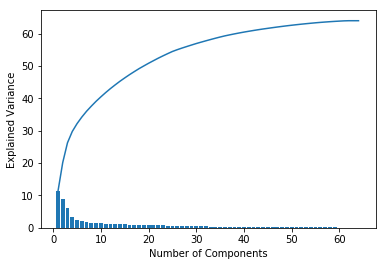

In [115]:
#plot the ratio of variance explained and cumulative variance explained
plt.bar(range(1, len(pca.explained_variance_) +1), pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.plot(range(1, len(pca.explained_variance_) +1), np.cumsum(pca.explained_variance_))

In [116]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca2 = PCA(30)
azdias_pca2 = pca2.fit_transform(azdias_standard)


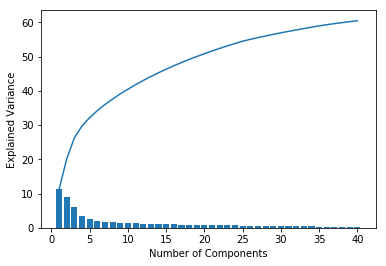

In [117]:
#plot the ratio of variance explained and cumulative variance explained using 40 components
plt.bar(range(1, len(pca2.explained_variance_) +1), pca2.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.plot(range(1, len(pca2.explained_variance_) +1), np.cumsum(pca2.explained_variance_))

### Discussion 2.2: Perform Dimensionality Reduction

After applying PCA to to the data, I have decided to continue with 15 components. This will explain between 50 and 60 percent of the data.


### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [118]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def comp_weights(pca2, i):
    
    component_weights = pd.DataFrame(pca2.components_, columns = azdias_low_nans_list)
    pos_weights = component_weights.iloc[i].sort_values(ascending=False)
    neg_weights = component_weights.iloc[i].sort_values(ascending=True)
    return pos_weights.head(5), neg_weights.head(5)



In [119]:
comp_weights(pca2,0)

(PLZ8_ANTG3                   0.223648
 PLZ8_ANTG4                   0.216129
 CAMEO_INTL_2015_wealth       0.208979
 CAMEO_INTL_2015_lifestage    0.208979
 HH_EINKOMMEN_SCORE           0.203786
 Name: 0, dtype: float64, MOBI_REGIO          -0.242195
 KBA05_ANTG1         -0.225859
 PLZ8_ANTG1          -0.224297
 KBA05_GBZ           -0.217275
 FINANZ_MINIMALIST   -0.213537
 Name: 0, dtype: float64)

In [120]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

comp_weights(pca2,1)

(ALTERSKATEGORIE_GROB    0.263248
 SEMIO_ERL               0.234648
 FINANZ_VORSORGER        0.231318
 SEMIO_LUST              0.184254
 RETOURTYP_BK_S          0.164427
 Name: 1, dtype: float64, SEMIO_REL                      -0.266071
 PRAEGENDE_JUGENDJAHRE_decade   -0.243404
 FINANZ_SPARER                  -0.238617
 SEMIO_PFLICHT                  -0.236972
 SEMIO_TRADV                    -0.233076
 Name: 1, dtype: float64)

In [121]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

comp_weights(pca2,2)

(SEMIO_VERT           0.348472
 SEMIO_SOZ            0.263402
 SEMIO_FAM            0.250922
 SEMIO_KULT           0.232792
 FINANZ_MINIMALIST    0.159463
 Name: 2, dtype: float64, ANREDE_KZ    -0.368860
 SEMIO_KAEM   -0.337952
 SEMIO_DOM    -0.313351
 SEMIO_KRIT   -0.269274
 SEMIO_RAT    -0.217148
 Name: 2, dtype: float64)

### Discussion 2.3: Interpret Principal Components

After mapping the weights to the corresponding feature name, I sorted the values from greatest to least. I then pulled the results for the top 5 indexes and the bottom 5 indexes.

I've listed below, the top and bottom features found at the top 3 indexes of the dataframe. I also used the data dictionary to document what the features represent. 

### Index 0

#### Top 3 Postive:
PLZ8_ANTG3                   0.223648      Number of 6-10 family houses in the PLZ8 region

PLZ8_ANTG4                   0.216129      Number of 10+ family houses in the PLZ8 region

CAMEO_INTL_2015_wealth       0.208979      German CAMEO: Wealth


#### Bottom 3 Negative:
PLZ8_ANTG1                  -0.224297      Number of 1-2 family houses in the PLZ8 region

KBA05_GBZ                   -0.217275      Number of buildings in the microcell

FINANZ_MINIMALIST           -0.213537      Financial Typology - MINIMALIST: low financial interest


### Index 1

#### Top 3 Positive:
ALTERSKATEGORIE_GROB         0.263248      Estimated age based on given name analysis

SEMIO_ERL                    0.234648      Personality Typology - ERL: event-oriented

FINANZ_VORSORGER             0.231318      Financial Typology- VORSORGER: be prepared


#### Bottom 3 Negative:
FINANZ_SPARER               -0.238617      Financial Typology - SPARER: money-saver

SEMIO_PFLICHT               -0.236972      Personality Typology - PFLICHT: dutiful

SEMIO_TRADV                 -0.233076      Personality Typology - TRADV: tradional-minded



### Index 2

#### Top 3 Positve:
SEMIO_VERT                   0.348472      Personality Typology - VERT: dreamful

SEMIO_SOZ                    0.263402      Personality Typology - SOZ: socially-minded

SEMIO_FAM                    0.250922      Personality Typology - FAM: family-minded


#### Bottom 3 Negative:
SEMIO_DOM                   -0.313351      Personality Typology - DOM: dominant-minded

SEMIO_KRIT                  -0.269274      Personality Typology - KRIT: critical-minded

SEMIO_RAT                   -0.217148      Personality Typology - RAT: rational


We can see that for index 0, German CAMEO: Wealth is positive, while is negative. We also see that Number of 6-10 family houses in the PLZ8 region is positive, while Number of 1-2 family houses in the PLZ8 region is negative. I've noted that Number of 6-10 family houses in the PLZ8 region, and Number of 10+ family houses in the PLZ8 region both have large weights and are both positive. If one of these features increases, the other feature will decrease.

Looking at index 1, we find that Financial Typology- VORSORGER: be prepared is positive, while Financial Typology - SPARER: money-saver is negative. And Personality Typology - ERL: event-oriented is positive, while Personality Typology - PFLICHT: dutiful is negative.

For index 2, all of the features are related to personality typology. Dreamful, socially-minded, and family_minded are positive, while dominant-minded, critical-minded, and rational are negative.


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [122]:
from sklearn import cluster
from sklearn.cluster import KMeans

In [123]:
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
    
    

In [124]:
#create function to run k-means clustering on the data and compute the average distance from each point to cluster's 
#center

def get_Kmeans_score(data, center):
    Kmeans = KMeans(n_clusters = center)
    model = Kmeans.fit(data)
    score = np.abs(model.score(data))
    return score




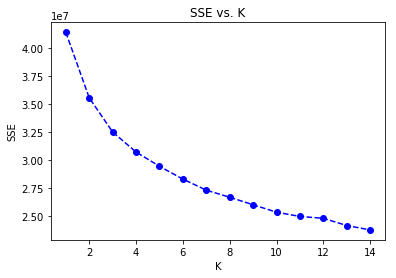

In [125]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
scores = []
centers = list(range(1,15))
    
for center in centers:
    scores.append(get_Kmeans_score(azdias_pca2, center))
        
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');


In [126]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

Kmeans = KMeans(n_clusters = 12)
model = Kmeans.fit(azdias_pca2)
azdias_cluster_prediction = model.predict(azdias_pca2)


In [127]:
azdias_cluster_prediction

array([6, 2, 3, ..., 1, 4, 9], dtype=int32)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [75]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep =';')

In [76]:
for i in customers.columns:
    if customers[i].dtype == np.int64:
        customers[i] = customers[i].astype(np.float64)

In [130]:

#azdias_cols = azdias.columns
#customers_cols = customers.columns

#common_cols = azdias_cols.intersection(customers_cols)
#azdias_not_cust = azdias_cols.difference(customers_cols)

In [77]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,4.0,1.0,5.0,5.0,1.0,5.0,1.0,2.0,2.0,2.0,0.0,4.0,1.0,1.0,20.0,5.0,2.0,2.0,10.0,5.0,1.0,4.0,5.0,6.0,5.0,2.0,6.0,6.0,7.0,3.0,4.0,1.0,3.0,1.0,1.0,2.0,1.0,3.0,0.0,0.0,1.0,3.0,10.0,2.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,1.0,5.0,1992.0,W,7.0,1,1A,13,2.0,2.0,0.0,0.0,0.0,4.0,3.0,2.0,4.0,4.0,1.0,4.0,3.0,1.0,1201.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1.0,4.0,1.0,NaN,5.0,1.0,5.0,1.0,3.0,2.0,2.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,3.0,6.0,2.0,6.0,7.0,5.0,3.0,4.0,1.0,3.0,3.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,3.0,11.0,3.0,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,4.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,2.0,0.0,3.0,1.0,2.0,13.0,3.0,1.0,1.0,10.0,5.0,1.0,4.0,5.0,2.0,2.0,1.0,3.0,3.0,7.0,7.0,1.0,2.0,7.0,5.0,6.0,4.0,1.0,1.0,0.0,0.0,2.0,3.0,6.0,1.0,0.0,1.0,NaN,6.0,9.0,1.0,0.0,8.0,1.0,1992.0,W,2.0,5,5D,34,2.0,2.0,0.0,0.0,0.0,3.0,7.0,4.0,1.0,3.0,3.0,3.0,1.0,7.0,433.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1.0,4.0,1.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,6.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,1.0,1.0,3.0,6.0,5.0,3.0,4.0,7.0,5.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,1.0,1.0,8.0,0.0,0.0,4.0,NaN,NaN,9.0,0.0,NaN,2.0,2.0,1992.0,W,7.0,4,4C,24,3.0,0.0,0.0,0.0,1.0,4.0,7.0,1.0,7.0,4.0,3.0,4.0,2.0,6.0,755.0,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1.0,3.0,1.0,6.0,3.0,1.0,4.0,4.0,5.0,2.0,2.0,1960.0,2.0,0.0,3.0,31.0,10.0,10.0,5.0,1.0,1.0,1.0,8.0,5.0,4.0,5.0,4.0,6.0,5.0,6.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,4.0,1.0,0.0,0.0,2.0,1.0,20.0,4.0,0.0,6.0,2.0,2.0,9.0,7.0,0.0,3.0,1.0,1992.0,W,3.0,7,7B,41,0.0,3.0,2.0,0.0,0.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,5.0,7.0,513.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [78]:
customers.shape

(191652, 85)

In [79]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

#apply clean_data function for the customers dataframe
clean_data(customers)


In [72]:
customers_low_nans.shape

NameError: name 'customers_low_nans' is not defined

In [132]:
#create copy of the customer dataframe
customers_imp = customers.copy()

#use SimpleImputer to handle missing values in the customers_imp dataframe
impute_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
customers_imp = impute_mode.fit_transform(customers_imp)
customers_imp = pd.DataFrame(customers_imp, columns = azdias_low_nans_list)

ValueError: Shape of passed values is (85, 191652), indices imply (64, 191652)

In [ ]:
#scale customers dataframe
customers_standard = scaler.fit_transform(customers_imp)

In [ ]:
#apply PCA to the data
pca1 = PCA(30)
customers_pca = pca1.fit_transform(customers_standard)


In [ ]:
#cluster predictions for the customer data.

customer_cluster_prediction = model.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?



In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.